C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


Accuracy stats of Multiple Linear Regression :
Accuracy with a margin of 100$ :  0.01809954751131222
Accuracy with a margin of 50$ :  0.01809954751131222
Accuracy with a margin of 25$ :  0.004524886877828055
Accuracy with a margin of 10$ :  0.004524886877828055


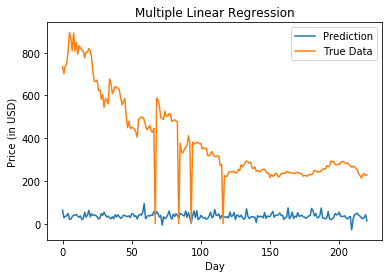

Average error :  357.133675646


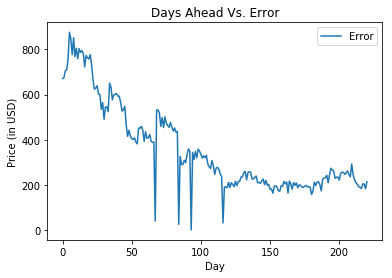

In [15]:
'''
Multiple Linear Regression 
'''

import pandas, sklearn, numpy
from sklearn import linear_model
import math
import matplotlib.pyplot as plt
import numpy as np
def init():
    # Load input data
    ipdata = pandas.read_csv("C://Users//User//Desktop//ML//Project//bitcoin_dataset.csv",  parse_dates=['Date'])

    # Drop rows with NaN
    for key in ipdata:
        try:
            ipdata = ipdata[np.isfinite(ipdata[key])]
        except:
            pass

    ipdata['next'] = pandas.Series([0] * len(ipdata['btc_market_price']), index = ipdata.index)
    ipdata = ipdata.drop('btc_trade_volume', 1)
    
    # Add next day's price
    for ind in ipdata.index:
        try:
            ipdata.ix[ind, 'next'] = ipdata['btc_market_price'][ind+1]
        except:
            if ind == max(ipdata.index):
                pass

    return ipdata.drop([max(ipdata.index)])

ipdata = init()

def correlation(dataset_arg, threshold, toprint = False):

    dataset = dataset_arg.copy(deep = True)
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i, j] >= threshold:
                colname = corr_matrix.columns[i] 
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname]

    if toprint:
        print(dataset)

    return dataset

def accuracyStats(l1, l2, *args):
    levels = set([100, 50, 25, 10])
    for l in args:
        levels.add(l)
    
    levels = list(levels)
    levels.sort(reverse=True)
    for l in levels:
        print("Accuracy with a margin of", str(l) + "$ : ", accuracy(l1, l2, l))

def plot_results(predicted_data, true_data, title='', xlab='', ylab=''):

    plt.title(title)
    plt.plot(range(len(predicted_data)), predicted_data, label='Prediction')
    plt.plot(range(len(true_data)), true_data, label='True Data')
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.legend()
    plt.show()
    return

def accuracy(predicted, actual, margin=100):
   

    if len(predicted) != len(actual):
        raise ValueError('"predicted list" and "actual" list are of unequal lengths!')

    total = len(predicted)
    correct = 0
    for p, a in zip(predicted, actual):
        if math.fabs(p - a) < margin:
            correct += 1

    return (correct/total)
        

data = correlation(ipdata, 0.75)

# Predictor variables
df = data.copy(deep = True)
del df['Date']

# Target
target = pandas.DataFrame(ipdata, columns = ["next"])

# Split into training and test sets; 80:20 split
row = round(0.8 * len(ipdata.index))
df = df.sample(frac=1).reset_index(drop=True)
trainX = df[:row]
trainY = df[row:]
testX = target[:row]['next']
testY = target[row:]['next']

X = trainX
y = testX

# Build model and make predictions
lm = linear_model.LinearRegression()
model = lm.fit(X, y)
predictions = lm.predict(trainY)

# Print stats
print("Accuracy stats of Multiple Linear Regression :")
accuracyStats(predictions, testY)
plot_results(predictions, testY, 'Multiple Linear Regression', 'Day', 'Price (in USD)')

errors = [math.fabs(x-y) for x,y in zip(predictions, testY)]
print("Average error : ", np.average(errors))
plt.plot(errors, label='Error')
plt.title('Days Ahead Vs. Error')
plt.xlabel('Day')
plt.ylabel('Price (in USD)')
plt.legend()
plt.show()

